<a href="https://colab.research.google.com/github/MrCat2357/Principios-de-Imageamento-Digital/blob/main/Filtro_M%C3%A9dia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

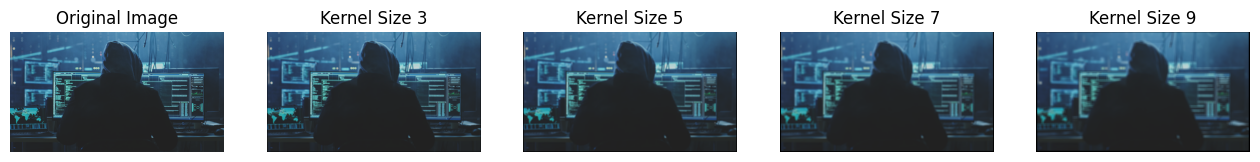

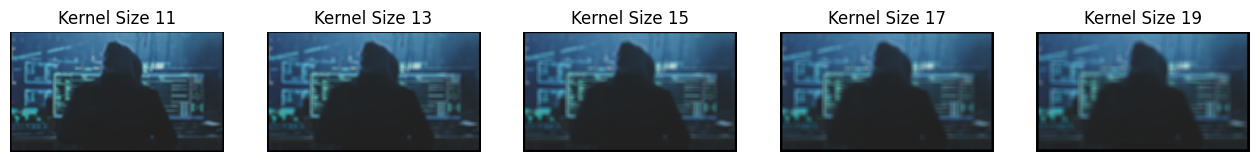

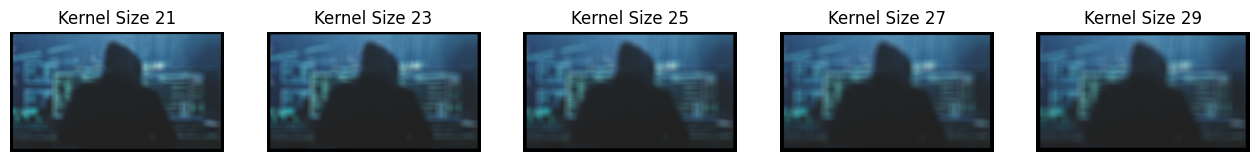

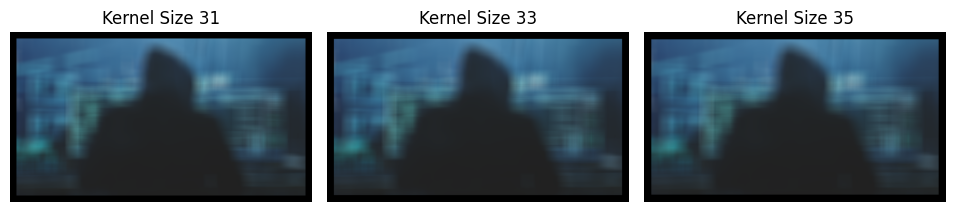

In [10]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
imagem = cv2.imread("/content/Hacker-Thumb-a1.png")

def apply_average_mask(image, kernel_size):
    height, width = image.shape[:2]
    filtered_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Calcula o tamanho do padding
    pad = kernel_size // 2

    # Percorre a imagem
    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            # Calcula a média aritmética para cada canal de cor
            for k in range(3):
                total = 0
                for m in range(-pad, pad + 1):
                    for n in range(-pad, pad + 1):
                       total += image[i + m, j + n, k]
                filtered_image[i, j, k] = total // (kernel_size * kernel_size)

    return filtered_image


# Carregar a imagem corretamente

if imagem is None:
    print("Erro ao carregar a imagem.")
else:
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)  # Converte de BGR para RGB

    # Define o tamanho do kernel inicial e o máximo
    kernel_size_min = 3
    kernel_size_max = 35

    # Plota a imagem original
    plt.figure(figsize=(16, 12))
    plt.subplot(2, 5, 1)
    plt.imshow(imagem)
    plt.title('Original Image')
    plt.axis('off')

    # Aplica máscaras de média aritmética com diferentes tamanhos de kernel e mostra as imagens
    index = 2
    for kernel_size in range(kernel_size_min, kernel_size_max + 1, 2):  # Aumenta de 2 em 2 para kernel_size ímpar
        filtered_image = apply_average_mask(imagem, kernel_size)
        plt.subplot(2, 5, index)
        plt.imshow(filtered_image)
        plt.title(f'Kernel Size {kernel_size}')
        plt.axis('off')
        index += 1
        if index > 5:  # Limita para mostrar no máximo 5 imagens por linha
            plt.show()
            plt.figure(figsize=(16, 12))
            index = 1

    plt.tight_layout()
    plt.show()
